# Checkpoint 1

Reminder: 

- You are being evaluated for compeletion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl

df = pd.read_csv('../data/states_edu.csv')
df.head()

/var/folders/11/6my3rgkj4qqgmfct4_hv3j680000gn/T/ipykernel_3696/3191200000.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen one of Grade 4 Reading, Grade 4 Math, or Grade 8 Math to focus on: Grade 4 Math

How many years of data are logged in our dataset? 

In [4]:
n = len(pd.unique(df['YEAR']))
print(n)
#33

33


Let's compare Michigan to Ohio. Which state has the higher average across all years in the test you chose?

In [31]:
df.dropna(subset=['AVG_MATH_4_SCORE'], inplace=True) #Removes all NaN values so it doesn't affect mean

df1 = df.loc[df['STATE'] == 'OHIO'] #Selects only rows with Ohio
print(df1['AVG_MATH_4_SCORE'].mean()) #Calculates mean of 4th grade math tests in all years in which Ohio has data

df2 = df.loc[df['STATE'] == 'MICHIGAN']
print(df2['AVG_MATH_4_SCORE'].mean())

#Ohio has the higher average

239.45454545454547
234.36363636363637


,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
35,1992_OHIO,OHIO,1992,NaN,9285961.0,472604.0,3631703.0,5181654.0,9483822.0,5172782.0,...,137839.0,137075.0,116085.0,NaN,NaN,1795199.0,219.0,268.0,217.0,NaN
443,2000_OHIO,OHIO,2000,1822566.0,15327834.0,843432.0,6425872.0,8058530.0,14909952.0,7497388.0,...,143373.0,139740.0,119704.0,1133611.0,541403.0,1835049.0,230.0,281.0,NaN,NaN
596,2003_OHIO,OHIO,2003,1803966.0,18018740.0,1097349.0,7844992.0,9076399.0,18760200.0,8958790.0,...,136776.0,147064.0,127993.0,1118015.0,567226.0,1845428.0,238.0,282.0,222.0,267.0
698,2005_OHIO,OHIO,2005,1778784.0,19746239.0,1413888.0,8313858.0,10018493.0,19785561.0,9700668.0,...,131691.0,144869.0,130436.0,1095686.0,578352.0,1839683.0,242.0,283.0,223.0,267.0
800,2007_OHIO,OHIO,2007,1758645.0,22142424.0,1461326.0,9341723.0,11339375.0,21336580.0,10202242.0,...,132634.0,139939.0,134417.0,1077618.0,585862.0,1827184.0,245.0,285.0,226.0,268.0


Find the average for your chosen test across all states in 2019

In [26]:
df = df.loc[df['YEAR'] == 2019] #Selects just rows with 2019, so all 50 states in 2019
df.loc[:, 'AVG_MATH_4_SCORE'].mean() #Calculates mean of 4th grade math test scores in the new table

#Returns 240, rounded to nearest whole number

239.9433962264151

For each state, find a maximum value for your chosen test score

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [13]:
states = df.groupby("STATE") #Group by states
df.groupby(["STATE"])['AVG_MATH_4_SCORE'].max()

STATE
ALABAMA                 233.0
ALASKA                  237.0
ARIZONA                 240.0
ARKANSAS                240.0
CALIFORNIA              235.0
COLORADO                247.0
CONNECTICUT             245.0
DELAWARE                243.0
DISTRICT_OF_COLUMBIA    235.0
DODEA                   250.0
FLORIDA                 246.0
GEORGIA                 240.0
HAWAII                  243.0
IDAHO                   242.0
ILLINOIS                239.0
INDIANA                 249.0
IOWA                    246.0
KANSAS                  248.0
KENTUCKY                242.0
LOUISIANA               234.0
MAINE                   246.0
MARYLAND                247.0
MASSACHUSETTS           253.0
MICHIGAN                238.0
MINNESOTA               253.0
MISSISSIPPI             241.0
MISSOURI                241.0
MONTANA                 244.0
NATIONAL                242.0
NEBRASKA                246.0
NEVADA                  237.0
NEW_HAMPSHIRE           253.0
NEW_JERSEY              249.0
NEW_

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [29]:
#Expenditures to revenue
# I added a feature for the ratio of Instruction and support services expenditure to revenue.
# I predict that states which invest a higher proportion of their revenue into education 
# would consistently outperform the ones where that is not the case.

# There is a "total expenditure" and "total revenue" column, but just in case the individual values for
# "instruction expenditure" or "support services expenditure" are missing, this will add in estimates
# for those values based on existing values (i.e. instruction expenditure = total - support services - other - capital outlay)


#df["TOTAL_REVENUE"].isna().sum()
#(df["ENROLL_ALL"]-df["ENROLL_PREK"]-df["ENROLL_KINDER"]-df["ENROLL_PRIMARY"]-df["ENROLL_HS"]).describe()
#((df["TOTAL_REVENUE"]-df["INSTRUCTION_EXPENDITURE"]-df["SUPPORT_SERVICES_EXPENDITURE"]-df["CAPITAL_OUTLAY_EXPENDITURE"]-df["OTHER_EXPENDITURE"])/df["TOTAL_REVENUE"]*100).describe()

df.dropna(subset=['TOTAL_REVENUE'], inplace=True)
df.dropna(subset=['INSTRUCTION_EXPENDITURE'], inplace=True)
df.dropna(subset=['SUPPORT_SERVICES_EXPENDITURE'], inplace=True)


df["RATIO"] = (df["INSTRUCTION_EXPENDITURE"] + df["SUPPORT_SERVICES_EXPENDITURE"]) / df["TOTAL_REVENUE"]

# Another one is state wealth - comparing the total revenue of the state to its student population in a given year



df["REVENUE_PER_CAPITA"] = (df["TOTAL_REVENUE"] / df["ENROLL"])
df


# A common trope of any generalization on educational attainment is that richer states produce richer students.
# The first predictor would suggest that the actual economic power of a state is relatively less significant
# than its willingness to invest in education. In the case of the second, since the data actually places 
# less densely populated states such as West Virginia or Alaska at the top of this metric, it would be interesting
# to see if the fact that these states technically have more money to spend per student than larger states such as
# New York or California contributes significantly to their educational attainment

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,RATIO,REVENUE_PER_CAPITA
51,1993_ALABAMA,ALABAMA,1993,727716.0,2827391.0,331409.0,1729295.0,766687.0,2833433.0,1564558.0,...,39900.0,NaN,NaN,734288.0,NaN,NaN,NaN,NaN,0.834233,3.885295
52,1993_ALASKA,ALASKA,1993,121156.0,1191398.0,176150.0,775829.0,239419.0,1126398.0,494917.0,...,6975.0,NaN,NaN,125948.0,NaN,NaN,NaN,NaN,0.779509,9.833586
53,1993_ARIZONA,ARIZONA,1993,676297.0,3427976.0,318465.0,1415407.0,1694104.0,3623946.0,1578889.0,...,37614.0,NaN,NaN,709453.0,NaN,NaN,NaN,NaN,0.752573,5.068743
54,1993_ARKANSAS,ARKANSAS,1993,311432.0,1346909.0,128196.0,771079.0,447634.0,1376067.0,782791.0,...,27169.0,NaN,NaN,444271.0,NaN,NaN,NaN,NaN,0.868148,4.324890
55,1993_CALIFORNIA,CALIFORNIA,1993,5129788.0,28043338.0,2151157.0,17064146.0,8828035.0,28110986.0,15281147.0,...,277271.0,NaN,NaN,5327231.0,NaN,NaN,NaN,NaN,0.862797,5.466764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,2016_VIRGINIA,VIRGINIA,2016,1283493.0,16259274.0,1058146.0,6297587.0,8903541.0,16497520.0,8944614.0,...,90500.0,773615.0,389330.0,1287026.0,NaN,NaN,NaN,NaN,0.867770,12.667988
1271,2016_WASHINGTON,WASHINGTON,2016,1083973.0,14964364.0,1097684.0,9211201.0,4655479.0,15253296.0,7087365.0,...,90645.0,667327.0,339349.0,1101711.0,NaN,NaN,NaN,NaN,0.801366,13.805108
1272,2016_WEST_VIRGINIA,WEST_VIRGINIA,2016,276764.0,3391579.0,358068.0,1863062.0,1170449.0,3366566.0,1804235.0,...,18155.0,159595.0,79442.0,273855.0,NaN,NaN,NaN,NaN,0.864344,12.254408
1273,2016_WISCONSIN,WISCONSIN,2016,857736.0,11697466.0,782610.0,5986763.0,4928093.0,11787535.0,5760418.0,...,66303.0,488983.0,262681.0,864432.0,NaN,NaN,NaN,NaN,0.808026,13.637606


Feature engineering justification: **<BRIEFLY DESCRIBE WHY YOU MADE THE CHANGES THAT YOU DID\>**

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

Text(0, 0.5, '4th Grade Math Score')

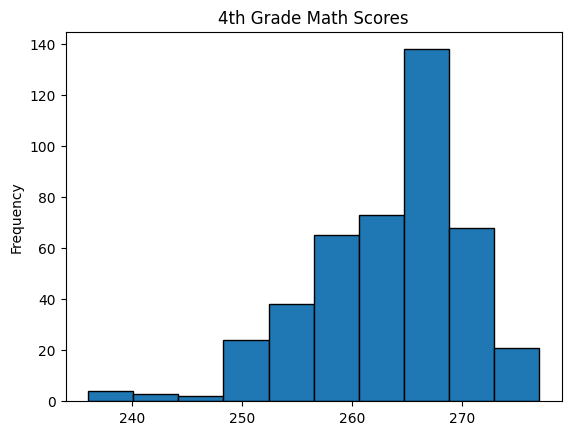

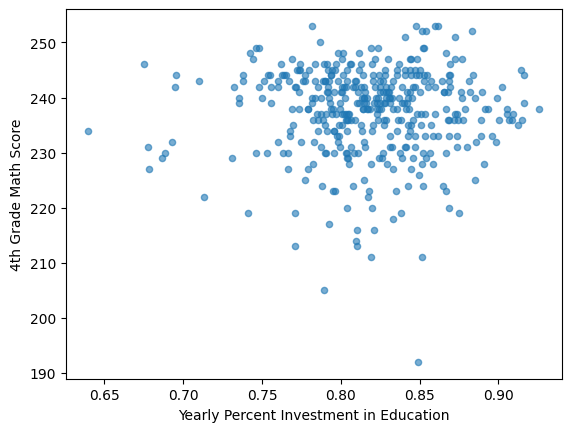

In [69]:
from matplotlib.figure import Figure
import matplotlib.pyplot as plt
from matplotlib.backends.backend_agg import FigureCanvas
import numpy as np

df.AVG_READING_8_SCORE.plot.hist(title="4th Grade Math Scores", edgecolor="black")

df.plot.scatter(x='RATIO', y='AVG_MATH_4_SCORE', alpha=0.6)
plt.xlabel('Yearly Percent Investment in Education')
plt.ylabel('4th Grade Math Score')

# There does not seem to be an especially strong correlation between the ratio of education expenditures to state income.
# It looks as though the increases in scores level off after about 75% of state revenue is spent on education

**<CAPTION FOR VIZ 1>**

**Visualization 2**

Text(0, 0.5, '4th Grade Math Score')

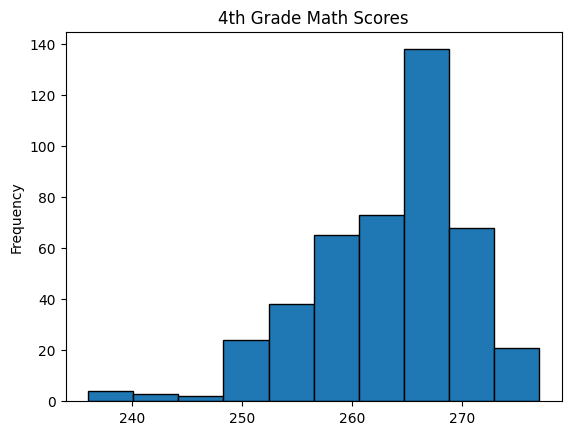

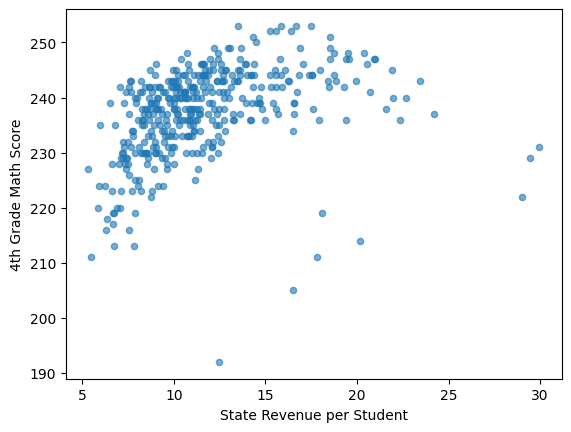

In [68]:
from matplotlib.figure import Figure
import matplotlib.pyplot as plt
from matplotlib.backends.backend_agg import FigureCanvas
import numpy as np

df.AVG_READING_8_SCORE.plot.hist(title="4th Grade Math Scores", edgecolor="black")

df.plot.scatter(x='REVENUE_PER_CAPITA', y='AVG_MATH_4_SCORE', alpha=0.6)
plt.xlabel('State Revenue per Student')
plt.ylabel('4th Grade Math Score')

# No strong correlation observed here either
# Higher revenue per student does not necessarily correspond to higher academic achievement. However, lower revenue
# per student does not result in poorer academic performance
# If the outliers on the right are excluded, the data would demonstrate some correspondence

**<CAPTION FOR VIZ 2>**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [36]:
from sklearn.model_selection import train_test_split

In [44]:
X = df[['ENROLL','RATIO','REVENUE_PER_CAPITA']].dropna()
y = df.loc[X.index]['AVG_MATH_4_SCORE']
y.fillna(y.median(), inplace=True)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(
      X, y, test_size = 0.3, random_state=0)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [50]:
from sklearn.linear_model import LinearRegression

In [52]:
model = LinearRegression()
model = model.fit(X_train, y_train)

In [ ]:
model.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [57]:
print(model.intercept_)
print(model.coef_)
print(model.score(X_test, y_test)) # Negative r^2 suggests that a linear model is a poor fit for this data

print(np.mean(model.predict(X_test)-y_test)) # Mean error is relatively low (0.386), in comparison to the r^2

print(np.mean((model.predict(X_test)-y_test)**2)**0.5) # Root mean squared error is 4.586



236.3700870654437
[1.17990156e-07 2.52089031e-01 1.86352307e-01]
-0.00022200910476444236
0.38601350805895623
4.5861959997954465


We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

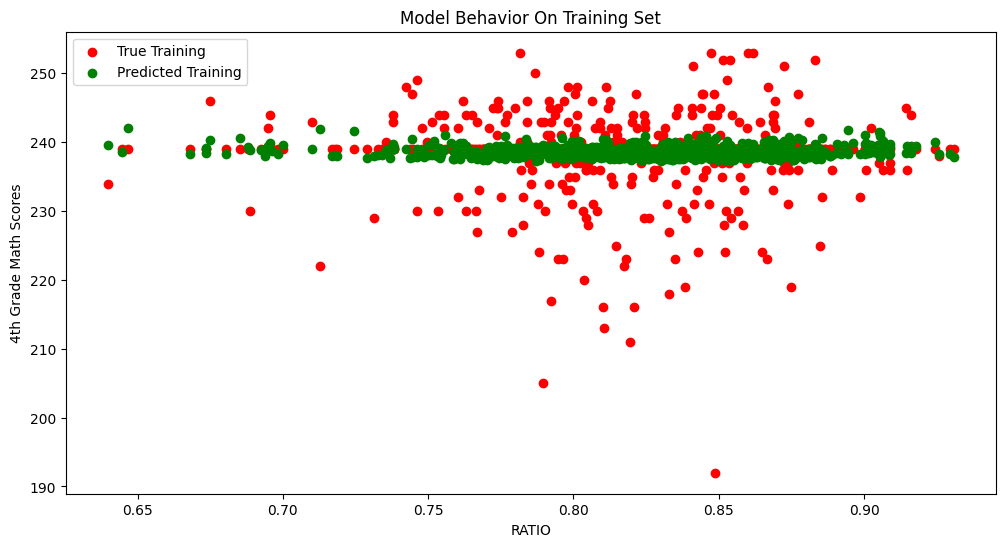

In [65]:
col_name = 'RATIO'
from matplotlib.figure import Figure
import matplotlib.pyplot as plt
from matplotlib.backends.backend_agg import FigureCanvas
import numpy as np

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('4th Grade Math Scores')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

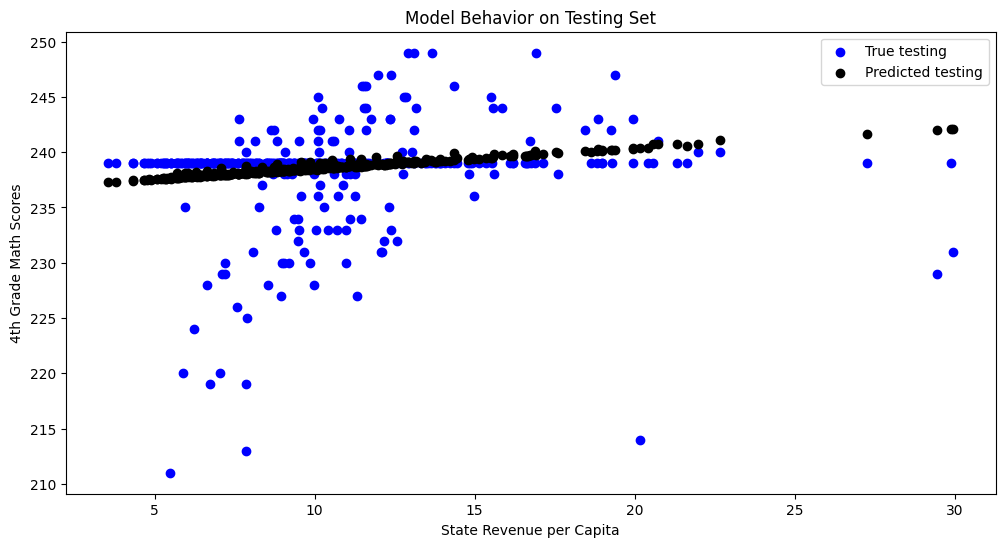

In [67]:
col_name = 'REVENUE_PER_CAPITA'

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel('State Revenue per Capita')
plt.ylabel('4th Grade Math Scores')
plt.title("Model Behavior on Testing Set")

<h2> Summary </h2>

**<Based on the r^2 value and the actual graphs comparing true testing and predicted testing, a linear model is a poor fit for predicting the results of 4th grade math scores from the state's revenue per student. The model predicted a weak linear correlation while the actual results were more parabolic. On the other hand, the training model for the ratio of state expenditures on education to its revenue versus 4th grade math scores more strongly indicated any real lack of correlation between the relative percentage of a state's income spent oneducation and its students' academic achievement. The model showed a consistent average of about 240 points regardless of this ratio, which ranged from 0.64 to 0.95\>**